#  Example of using Symbolic regression

https://github.com/MilesCranmer/PySR

This is an example of using test data with a knon function with some randon numbers

$$
y(x) =  2.5382 cos(x) + x^2 - 0.5 
$$


The function is evaluated over some random points x.

The test is whether the symbolic regressio library can reproduce the input function


In [7]:
import numpy as np

X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 3] ** 2 - 0.5

In [8]:
print(y.shape)
print(X.shape)

(100,)
(100, 5)


Text(0, 0.5, 'y')

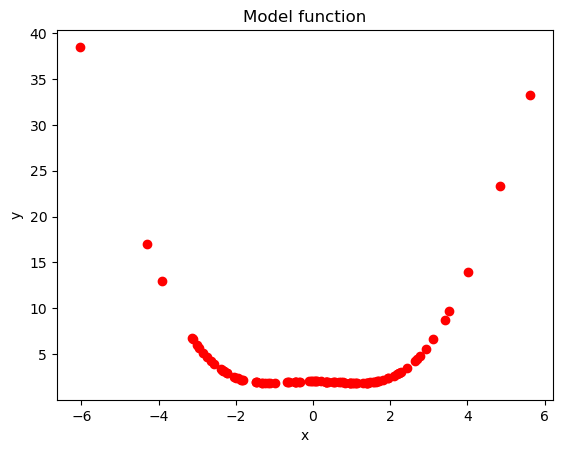

In [17]:
import matplotlib.pyplot as plt
plt.plot(X[:,3],y, "ro")
plt.title("Model function")
plt.xlabel("x")
plt.ylabel("y")


# Run the symbolic regression code

https://pypi.org/project/pysr/

The pysr module needs to be installed


In [18]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [19]:
model.fit(X, y)

/home/cmcneile/anaconda3/envs/symbol_regress/lib/python3.11/site-packages/pysr/sr.py:1276: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                          3.9707644   
	1        1.144047e+00                                          (x3 * x3)   
	2        8.921601e-02                           ((x3 * x3) * 0.90237904)   
	3        7.362578e-01                              ((x3 * x3) + cos(x3))   
	4        8.231727e-01                 ((x3 * x3) + (cos(x3) * 2.451069))   
	5        8.120791e-08          ((x3 * x3) + (cos(x3) * exp(0.89653456)))   
	6        2.750034e+01   (((x3 * x3) + (cos(x3) * 2.5382)) + -0.50000006)   
	7  >>>>  1.364436e-01  ((((x3 * x3) + ((cos(x3) * 2.5382001) + -0.551...   
	
	           loss  complexity  
	0  3.143273e+01           1  
	1  3.189151e+00           3  
	2  2.667983e+00           5  
	3  1.277704e+00           6  
	4  2.462815e-01           8  
	5  2.462814e-01           9  
	6  2.806644e-13          10  
	7  9.421797e-14          18  
]

In [20]:
print(model)

PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                          3.9707644   
	1        1.144047e+00                                          (x3 * x3)   
	2        8.921601e-02                           ((x3 * x3) * 0.90237904)   
	3        7.362578e-01                              ((x3 * x3) + cos(x3))   
	4        8.231727e-01                 ((x3 * x3) + (cos(x3) * 2.451069))   
	5        8.120791e-08          ((x3 * x3) + (cos(x3) * exp(0.89653456)))   
	6        2.750034e+01   (((x3 * x3) + (cos(x3) * 2.5382)) + -0.50000006)   
	7  >>>>  1.364436e-01  ((((x3 * x3) + ((cos(x3) * 2.5382001) + -0.551...   
	
	           loss  complexity  
	0  3.143273e+01           1  
	1  3.189151e+00           3  
	2  2.667983e+00           5  
	3  1.277704e+00           6  
	4  2.462815e-01           8  
	5  2.462814e-01           9  
	6  2.806644e-13          10  
	7  9.421797e-14          18